
# **Artificial Intelligence  FEUP**
## **2nd Assignment - Supervised Learning**
### **3rd Year - 2nd Semester - 2024/2025**



# Import Libraries and Set Options

Import necessary libraries for data handling, visualization, and machine learning.  
Set pandas display options and seaborn plot style for better readability.

- **pandas** for loading CSV files and handling structured data efficiently.
- **NumPy** for fast numerical operations and array manipulations.
- **matplotlib** and **seaborn** to visualize data and uncover patterns through charts and plots.
- **scikit-learn** for machine learning tasks like splitting datasets, scaling features, training models, and measuring their performance with built-in metrics.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

# Load and Preview Dataset

Load the dataset from a CSV file and take a quick look at the first few rows.  
Also, check the shape, data types, and basic statistics of the dataset.

In [10]:
df = pd.read_csv('./original/train.csv')
df.head()  # Preview dataset

print(f"Dataset shape: {df.shape}")
df.info()
df.describe()

Dataset shape: (159256, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  in

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,76.874071,98.352552,195.796165,127.616046,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,8.994642,15.329740,28.396959,66.188989,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,77.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,375.000000,393.000000,766.000000,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


# Check and Handle Missing Values

Identify if there are any missing values in the dataset.  
If missing values exist, fill them with the median of the respective columns.

In [11]:
missing_total = df.isnull().sum().sum()
print(f"Valores em falta no dataset de treino: {missing_total}")

if missing_total > 0:
    print("Preencher valores em falta com a mediana.")
    df = df.fillna(df.median(numeric_only=True))
else:
    print("Nenhum valor em falta encontrado.")

Valores em falta no dataset de treino: 0
Nenhum valor em falta encontrado.


# Exploratory Data Analysis (EDA)

Visualize the distribution of the target variable (smoking).  
Plot a correlation heatmap to understand relationships between numerical features.

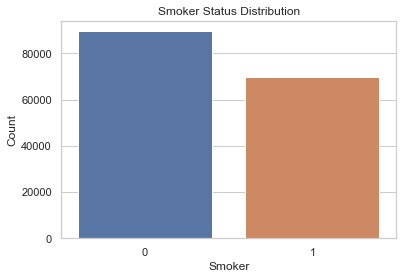

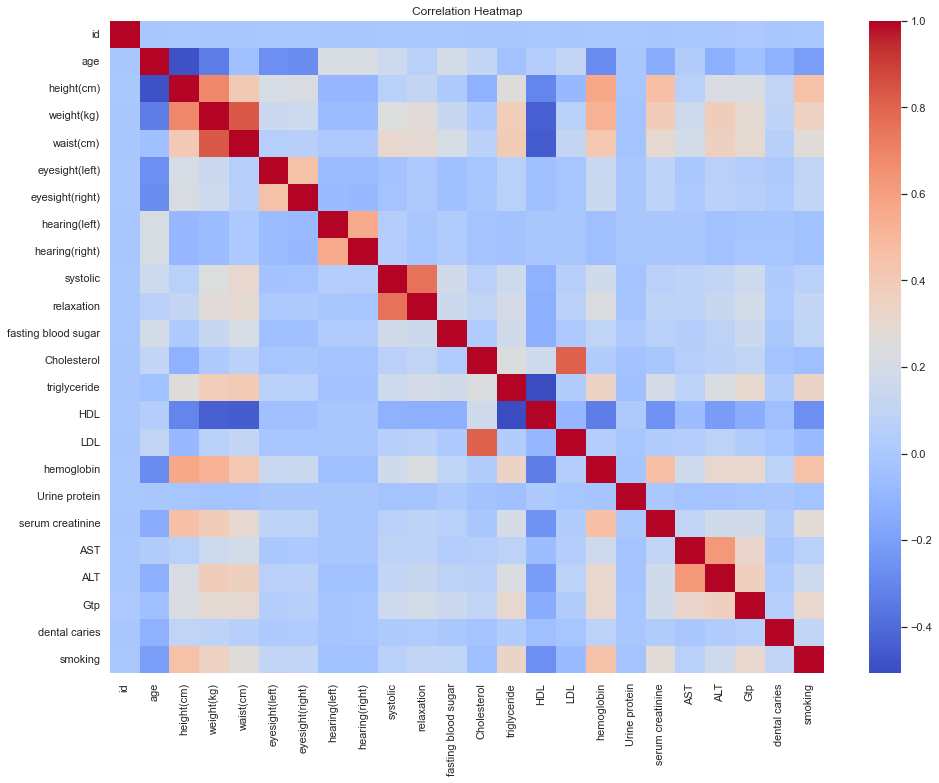

In [12]:
# Distribution of smoking variable
sns.countplot(x='smoking', data=df)
plt.title("Smoker Status Distribution")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplots of Features by Smoking Status

Create boxplots for selected features grouped by smoking status to identify patterns or differences.

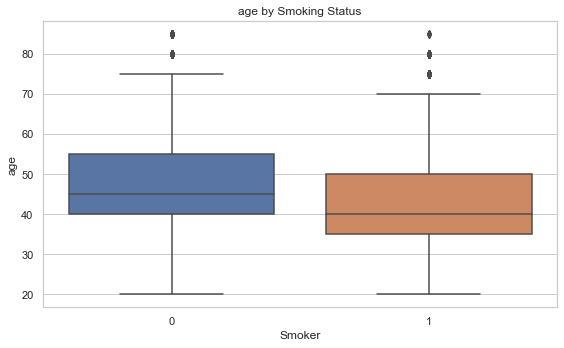

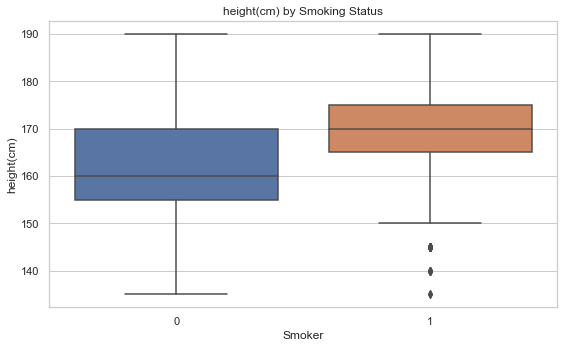

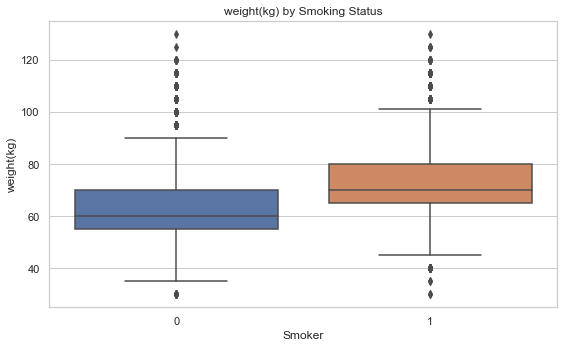

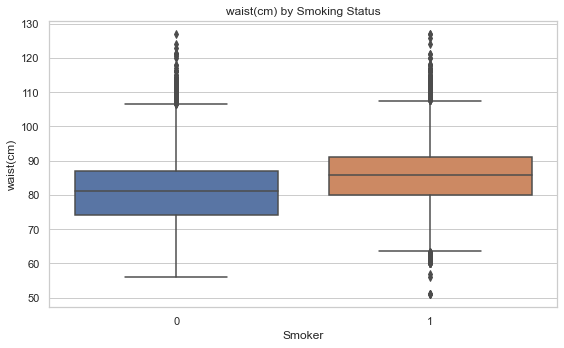

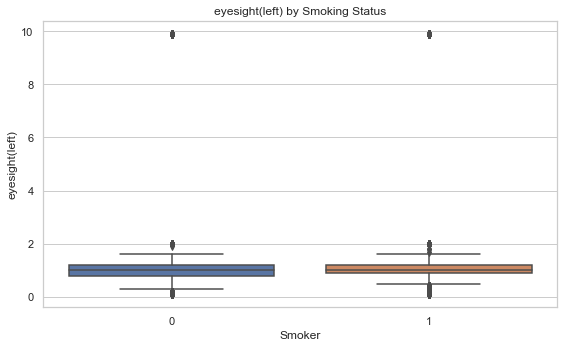

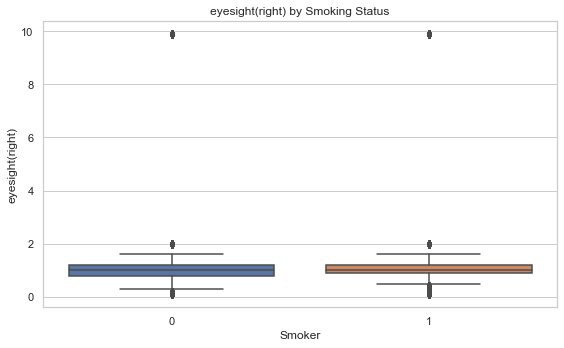

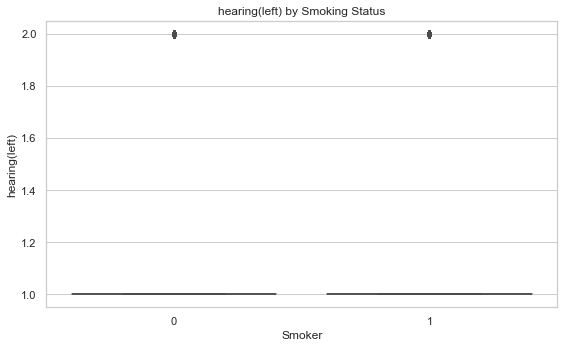

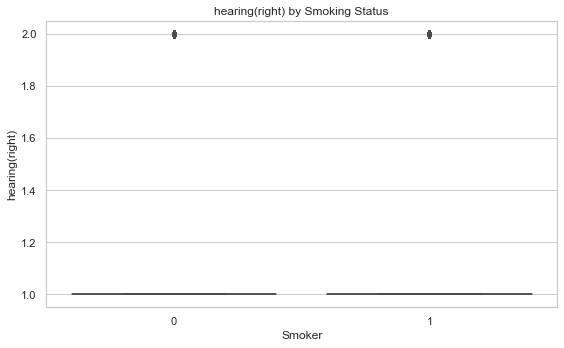

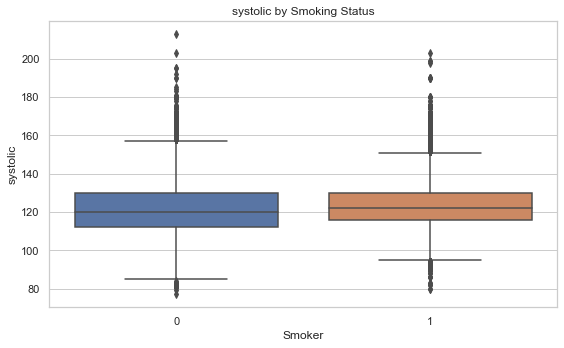

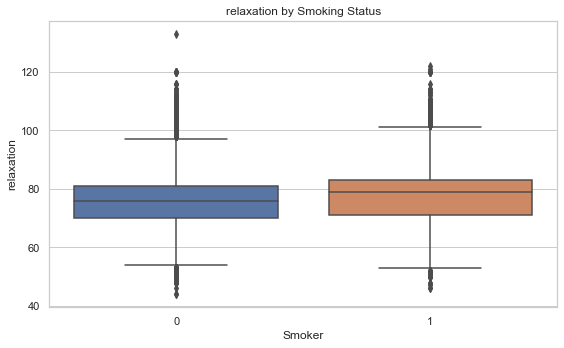

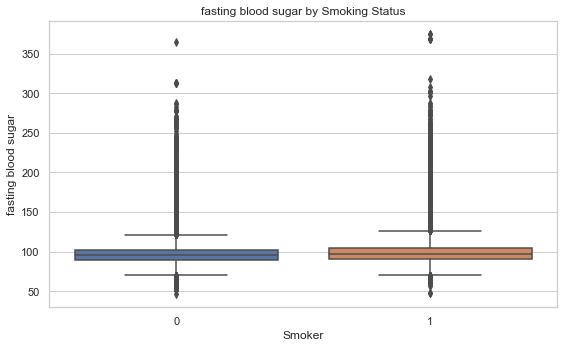

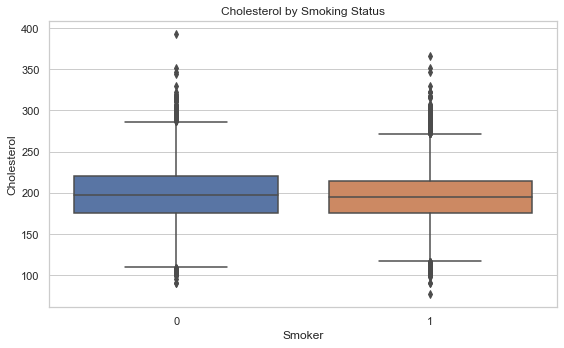

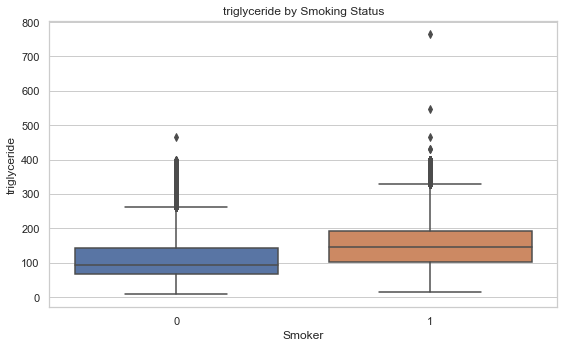

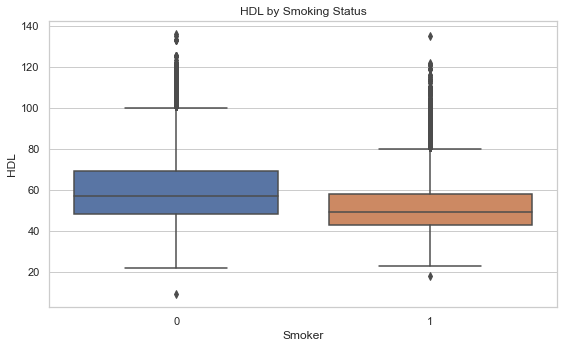

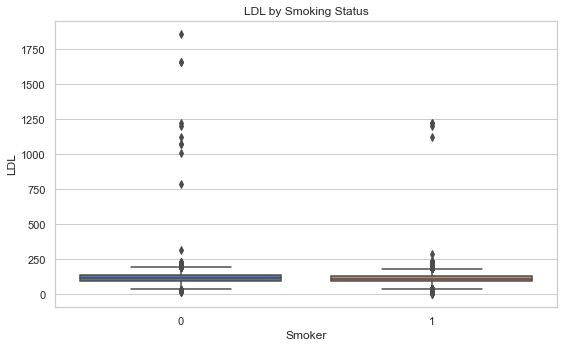

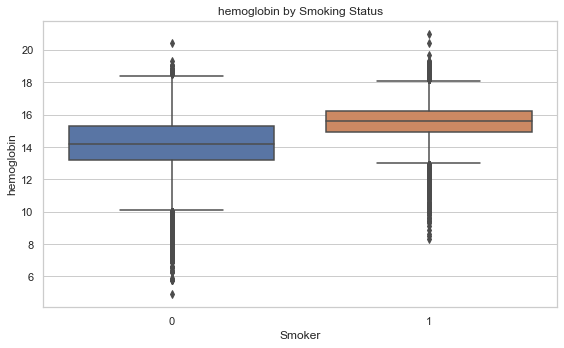

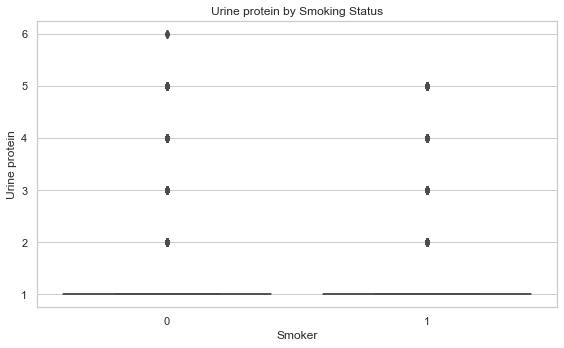

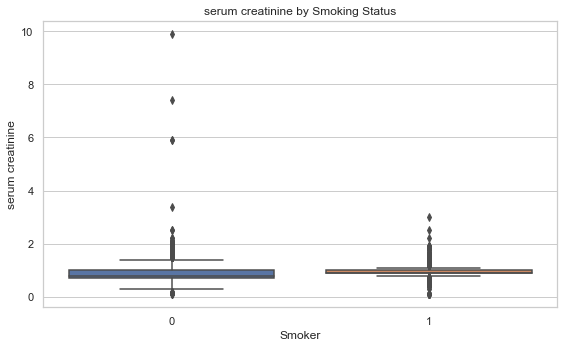

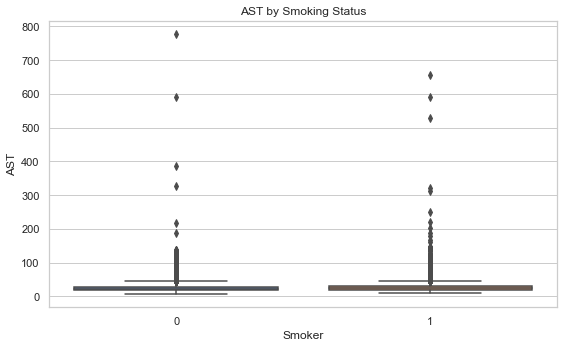

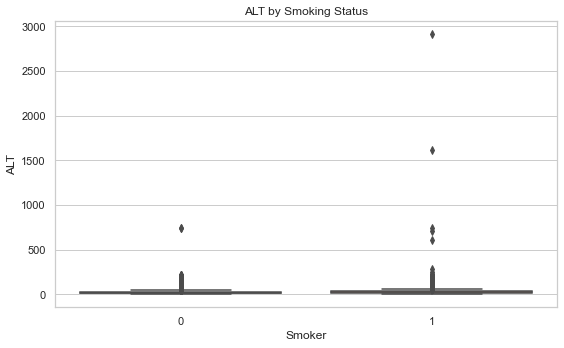

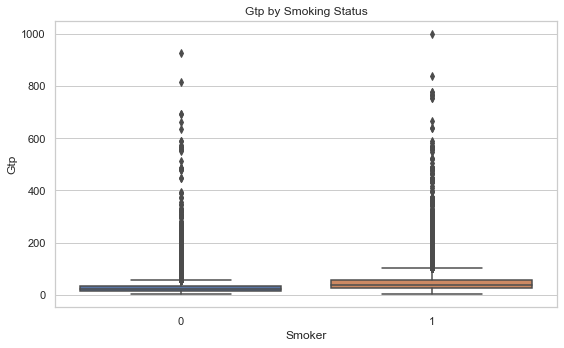

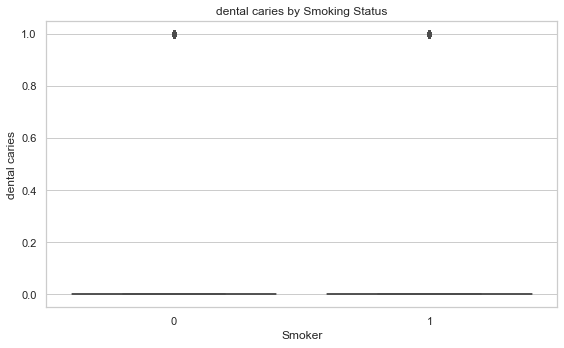

In [13]:
features = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
            'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
            'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
            'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='smoking', y=feature, data=df)
    plt.title(f"{feature} by Smoking Status")
    plt.xlabel("Smoker")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# Data Cleaning and Splitting

Remove unnecessary columns (like 'id').  
Separate the dataset into features (X) and target variable (y).

In [14]:
df = df.drop(columns=['id'])  # Drop id column
X = df.drop(columns=['smoking'])  # Features
y = df['smoking']  # Target variable

# Feature Scaling

Normalize the feature data using standardization (mean=0, std=1) to improve model performance.

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

Split the data into training and testing sets with stratification to maintain class distribution.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)